In [1]:
import numpy as np

from numpy import linalg

from matplotlib import pyplot as plt

import pandas as pd

In [3]:
# Importing stock return data
returns = pd.read_csv("data_stock_returns.csv")




In [4]:
# taking a look at the data initially
returns.head()


,Date,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,...,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
0,2019-01-02,0.009829,0.010542,0.009354,0.018961,-0.006221,0.043115,0.031979,0.035795,0.018333,...,-0.023222,-0.011107,-0.038352,-0.023718,-0.027728,-0.007796,-0.004564,-0.013306,-0.024556,-0.021542
1,2019-01-03,-0.036155,-0.001703,0.007825,0.004524,-0.024525,-0.005824,0.002515,0.020651,-0.020871,...,-0.002476,0.001196,-0.009491,-0.000197,0.010085,-0.003564,0.014082,0.004579,0.002660,-0.003948
2,2019-01-04,0.039127,0.051651,0.033218,0.027974,0.030381,0.017754,0.019072,0.068034,0.070034,...,0.018249,0.017378,0.033601,0.010764,0.012229,0.030242,0.008310,0.029491,0.007352,0.009738
3,2019-01-07,0.027806,-0.004204,-0.010668,0.021706,0.008630,0.014810,0.014271,0.011252,0.036862,...,-0.001450,0.005467,0.009179,0.002139,-0.001890,0.001384,-0.002239,-0.000181,-0.004552,-0.004339
4,2019-01-08,0.029859,-0.002524,0.008152,0.025441,0.007748,0.026410,0.020041,0.002793,0.016194,...,0.007287,0.018519,0.015114,0.003878,0.014904,0.013059,0.028071,0.027595,0.010249,0.011530


In [9]:
num_of_stocks = len(returns.columns)

print("There are {} stocks in this dataframe".format(num_of_stocks))



There are 489 stocks in this dataframe


In [14]:
# Checking for null values
returns.isna().sum().value_counts()
# there seems to be no null values

0    489
dtype: int64

In [27]:
# Converting the date column to a datetime data type
returns['Date'] = pd.to_datetime(returns['Date'])


#Checking how many days this dataset includes
len(returns)

252

In [16]:
amzn_returns = returns["AMZN"]

amzn_returns

0      0.024440
1     -0.025566
2      0.048851
3      0.033776
4      0.016476
         ...   
247   -0.002116
248    0.043506
249    0.000551
250   -0.012328
251    0.000514
Name: AMZN, Length: 252, dtype: float64

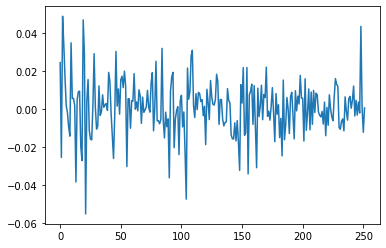

In [17]:
# plotting Amazon's returns over the time period  

x = amzn_returns.index
y= amzn_returns

plt.plot(x,y)

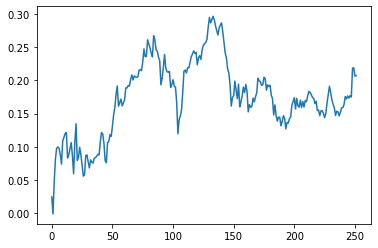

In [30]:
# Plotting the cumulative sum on Amazon stock returns over the time period

x = amzn_returns.index
y= amzn_returns.cumsum()

plt.plot(x,y)

# Linear Regression Section

In [119]:
# the module below will allow me to perform linear regression
import statsmodels.api as sm
from sklearn.preprocessing import scale

In [28]:
# creates a function that performs linear regression
def lin_reg(x, y):   
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

In [33]:
np.set_printoptions(precision=5,suppress = True)
# To put numpy arrays into nonscientific notation



In [26]:
sm.add_constant(intc)

array([[ 1.00000000e+00,  3.19123993e-03],
       [ 1.00000000e+00, -5.65839798e-02],
       [ 1.00000000e+00,  5.95531248e-02],
       [ 1.00000000e+00,  4.64821607e-03],
       [ 1.00000000e+00,  6.30387198e-03],
       [ 1.00000000e+00,  5.63955761e-03],
       [ 1.00000000e+00,  1.13909727e-02],
       [ 1.00000000e+00,  7.59055457e-03],
       [ 1.00000000e+00, -1.19245327e-02],
       [ 1.00000000e+00,  5.15728666e-03],
       [ 1.00000000e+00, -9.71790127e-03],
       [ 1.00000000e+00,  7.03937928e-03],
       [ 1.00000000e+00,  1.47454130e-02],
       [ 1.00000000e+00, -1.88801625e-02],
       [ 1.00000000e+00, -6.86009375e-03],
       [ 1.00000000e+00,  3.72613003e-02],
       [ 1.00000000e+00, -5.62129920e-02],
       [ 1.00000000e+00, -7.04018811e-03],
       [ 1.00000000e+00, -3.64608030e-03],
       [ 1.00000000e+00,  2.12593795e-02],
       [ 1.00000000e+00, -8.87394713e-03],
       [ 1.00000000e+00,  3.35970964e-02],
       [ 1.00000000e+00,  1.00053661e-02],
       [ 1.

In [29]:
aapl = returns['AAPL'].to_numpy()
intc = returns['INTC'].to_numpy()
msft = returns['MSFT'].to_numpy()
ibm = returns['IBM'].to_numpy()

# creating a linear regression with intel's returns as the predictor and apple's returns as the response variable
aapl_intc_reg = lin_reg(intc,aapl)




In [31]:
# the coefficients of the regression
aapl_intc_reg[0]

array([0.00195633, 0.53526326])

In [33]:
resid = aapl_intc_reg[1]

In [35]:
# residual equals actual minus fitted, which means that the fitted values equals actual minus residual
# to obtain a series of fitted values for apple, I will subtract the residuals from the aapl numpy array

fitted_aapl = pd.Series(aapl - resid)




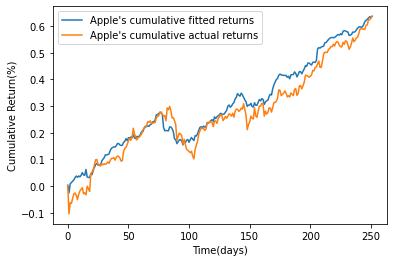

In [39]:
# Plotting the cumulative fitted returns vs the cumulative actual returns

x = fitted_aapl.cumsum().index

y1 = fitted_aapl.cumsum()

y2= returns['AAPL'].cumsum()

plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel("Time(days)")
plt.ylabel('Cumulative Return(%)')
plt.legend(["Apple's cumulative fitted returns","Apple's cumulative actual returns"])


In [40]:
aapl_intc_reg[2] # this is the r_squared value, which is the coeffficient of determination



0.3050299157977574

### The independent variable(Intel's stock returns) explains about 30.5% of the variation in the response variable(Apple's stock returns). This indicates that there is only a weak to moderate connection between Intel's stock returns and Apple's stock returns. 


In [41]:
# Using the returns of Intel, Microsoft, and IBM to predict Apple's returns
y = aapl

x1 = intc
x2 = msft
x3 = ibm
x = np.array([x1,x2,x3])
x = x.transpose()



aapl_reg2 = lin_reg(x,y)

In [42]:
# residual equals actual minus fitted, which means that the fitted values equals actual minus residual
# to obtain a series of fitted values for apple, I will subtract the residuals from the aapl numpy array

resid2 = aapl_reg2[1]

fitted_aapl2 = pd.Series(aapl - resid2)



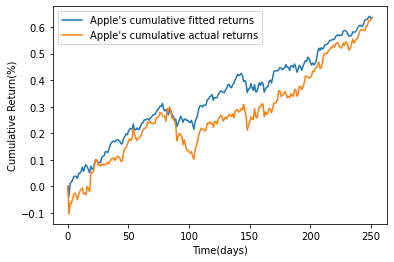

In [43]:
# Once again plotting apple's cumulative fitted returns versus its cumulative actual returns
x = fitted_aapl2.cumsum().index


y1 = fitted_aapl2.cumsum()

y2= returns['AAPL'].cumsum()

plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel("Time(days)")
plt.ylabel('Cumulative Return(%)')
plt.legend(["Apple's cumulative fitted returns","Apple's cumulative actual returns"])

In [44]:
aapl_reg2[2]

0.4704730705676301

### The R-Squared value for this regression is 0.47047, which means that the predictors explain 47.047% of the variance in the response variable. The predictors in this regression(the returns of Intel, Microsoft, and IBM) seem to have a stronger connection with the response variable(Apple's returns) than the previous regression.



# PCA Regression Section

The file SPY.csv contains the prices of SPDR S&P 500 ETF Trust. This Exchange Traded Fund (ETF) contains a collection of assets currently present in the S&P 500 index. 



In [39]:
# Loading in a new dataset of prices of the SPDR S&P 500 ETF, which will eventually be used as the target variable
spy_prices = pd.read_csv("SPY.csv")

spy_prices.set_index("Date", inplace = True)


In [40]:
# Examining the dataframe's values 

spy_prices.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763


In [48]:
pd.Series(pd.to_datetime(spy_prices.index)).describe(datetime_is_numeric= True)

count                             1362
mean     2017-09-15 11:27:13.480176384
min                2015-01-02 00:00:00
25%                2016-05-10 06:00:00
50%                2017-09-14 12:00:00
75%                2019-01-23 18:00:00
max                2020-06-01 00:00:00
Name: Date, dtype: object



### The ETF's highest and lowest prices for a particular day are shown in addition to the opening and closing prices for that day. There is also the adjusted closing price, which I assume would mean accounting for inflation or standardizing the price in comparison to the rest of the market.

### These prices are reported from January 2nd 2015 to June 1st of 2020.

In [51]:
# code for question 16
spy_adjclose = spy_prices['Adj Close']

spy_adjclose

Date
2015-01-02    184.260223
2015-01-05    180.932541
2015-01-06    179.228363
2015-01-07    181.461731
2015-01-08    184.681763
                 ...    
2020-05-26    297.769623
2020-05-27    302.200134
2020-05-28    301.642609
2020-05-29    302.986694
2020-06-01    304.211273
Name: Adj Close, Length: 1362, dtype: float64

In [52]:
# Computing the returns on the Adjusted Close prices of SPY, from the start of the 2019 to the start of 2020


spy_returns = spy_adjclose.pct_change()[(spy_adjclose.index >= "2019-01-01") & (spy_adjclose.index <= '2020-01-01')]



spy_returns

Date
2019-01-02    0.001040
2019-01-03   -0.023863
2019-01-04    0.033496
2019-01-07    0.007885
2019-01-08    0.009395
                ...   
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: Adj Close, Length: 252, dtype: float64

In [43]:
returns.set_index('Date', inplace= True)

In [111]:
# Scaling values so that no single column outweighs another due to greater variance
scaled_returns = scale(returns)

In [113]:
# Performing SVD on returns from earlier(scaled)

np_returns = scaled_returns

A = np.linalg.svd(np_returns)

U = A[0]

V = A[2]

# The left singular vector corresponding to the largest singular value  
u_sigma1 = U[:,0]



## u_sigma1 is thought to track the market. To test that, I will perform a regression of spy_returns against this first left singular vector by letting y=spy_returns and x=u_sigma1.




In [116]:
# Use the first principal component(left singular vector) to predict the overall stock market returns

x= u_sigma1

y = spy_returns

spy_reg = lin_reg(x,y)

spy_reg

(const    0.001110
 x1       0.121541
 dtype: float64,
 Date
 2019-01-02    0.001541
 2019-01-03   -0.003382
 2019-01-04    0.002333
 2019-01-07   -0.000501
 2019-01-08   -0.000452
                 ...   
 2019-12-24   -0.000111
 2019-12-26    0.002848
 2019-12-27    0.000377
 2019-12-30   -0.001925
 2019-12-31   -0.000711
 Length: 252, dtype: float64,
 0.9475459049384576)

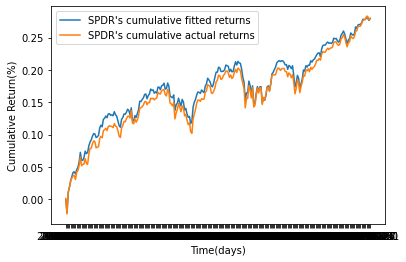

In [117]:
# Plotting Cumulative fitted returns versus actual returns
spy_reg_resid = spy_reg[1]


fitted_spy_reg = spy_returns - spy_reg_resid

x = fitted_spy_reg.cumsum().index


y1 = fitted_spy_reg.cumsum()

y2= spy_returns.cumsum()

plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel("Time(days)")
plt.ylabel('Cumulative Return(%)')
plt.legend(["SPDR's cumulative fitted returns","SPDR's cumulative actual returns"])

In [118]:
spy_reg[2]

0.9475459049384576

### The left singular vector with the highest eigenvalue explains 94.75% of the variance in the SPDR ETF's returns. This indicates a strong relationship between the predictor and the response variable.

## As we can see, if we perform a PCA Regression using sklearn, we get the same results for the coefficient of determination

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [69]:

scaled_x = scale(returns)

X = scaled_x
y = spy_returns

In [110]:
pca = PCA()

x_train_pc = pca.fit_transform(X)

component = x_train_pc[:,0].reshape(-1,1)
pca_reg = LinearRegression()

pca_reg.fit(component,y)
pca_reg.score(component,y)






0.9475459049384576